In [1]:
!pip install yfinance --upgrade --no-cache-dir


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Data Import
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

#Mount Drive
from google.colab import drive

yf.pdr_override()

#Modelling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor


#Modelling Metrics
from sklearn import metrics




  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=1a427066d6135fa4b25b6e4eb1fd41d5a643c03cd12f3499c5889f6e8d6596fe
  Stored in directory: /tmp/pip-ephem-wheel-cache-55i14kps/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [2]:
drive.mount("/content/drive", force_remount=True)
%cd "/content/drive/My Drive/ML/mll_homework"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/ML/mll_homework


In [3]:
df_full = pdr.get_data_yahoo("AMZN", start="2017-01-01").reset_index()
df_full.to_csv("output/AMZN.csv", index=False)

[*********************100%***********************]  1 of 1 downloaded


In [4]:
df_full.shape

(676, 7)

In [5]:
df_full.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100
1,2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500
2,2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100
3,2017-01-06,782.359985,799.440002,778.479980,795.989990,795.989990,5986200
4,2017-01-09,798.000000,801.770020,791.770020,796.919983,796.919983,3446100
5,2017-01-10,796.599976,798.000000,789.539978,795.900024,795.900024,2558400
6,2017-01-11,793.659973,799.500000,789.510010,799.020020,799.020020,2992800
7,2017-01-12,800.309998,814.130005,799.500000,813.640015,813.640015,4873900
8,2017-01-13,814.320007,821.650024,811.400024,817.140015,817.140015,3791900
9,2017-01-17,815.700012,816.000000,803.440002,809.719971,809.719971,3670500


In [6]:
df_full.describe()

,Open,High,Low,Close,Adj Close,Volume
count,676.000000,676.000000,676.000000,676.000000,676.000000,6.760000e+02
mean,1432.072706,1445.210341,1415.996332,1431.364349,1431.364349,4.497699e+06
std,391.703565,395.852304,386.019937,390.870489,390.870489,2.246578e+06
min,757.919983,758.760010,747.700012,753.669983,753.669983,1.585100e+06
25%,996.410004,999.485000,986.472503,993.829986,993.829986,2.961775e+06
50%,1557.270019,1576.049988,1524.784973,1551.669983,1551.669983,3.800050e+06
75%,1785.492523,1800.005005,1761.652527,1781.105011,1781.105011,5.371725e+06
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,1.656500e+07


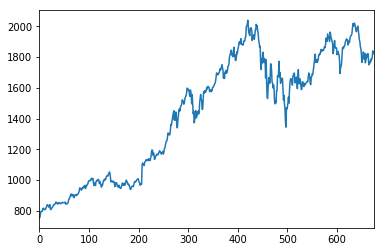

In [7]:
df_full["Adj Close"].plot()

Data Preprocessing

In [0]:
df_full.set_index("Date", inplace=True)


In [9]:
df_full.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100
2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500
2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100
2017-01-06,782.359985,799.440002,778.479980,795.989990,795.989990,5986200
2017-01-09,798.000000,801.770020,791.770020,796.919983,796.919983,3446100


In [0]:
window_size=32
num_samples = len(df_full)-window_size

#Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df_full["Adj Close"].values[indices] #Create the 2D matric of training
x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] #Each output value represents the 33rd day

In [0]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [0]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [13]:
x_train.shape

(515, 32)

Modelling

In [0]:
#Help Functions
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

Baseline

In [0]:
y_pred_lag = np.roll(y_test, 1)

In [16]:
get_performance(y_pred_lag)

Mean Absolute Error: 21.0226
Mean Squared Error: 954.4369
Root Mean Squared Error: 30.894


In [0]:
get_plot(y_pred_lag)

Linear Regression

In [0]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)


In [0]:
y_pred_lr = model_lr.predict(x_test)

In [22]:
get_performance(y_pred_lr)

Mean Absolute Error: 21.7139
Mean Squared Error: 776.3104
Root Mean Squared Error: 27.8623


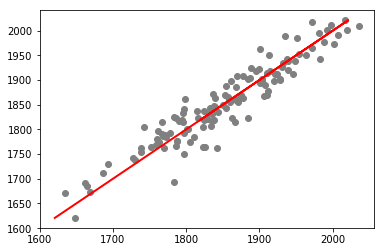

In [30]:
get_plot(y_pred_lr)

Ridge Regression

In [0]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#prediction
y_pred_ridge=model_ridge.predict(x_test)

In [27]:
get_performance(y_pred_ridge)

Mean Absolute Error: 21.7139
Mean Squared Error: 776.3097
Root Mean Squared Error: 27.8623


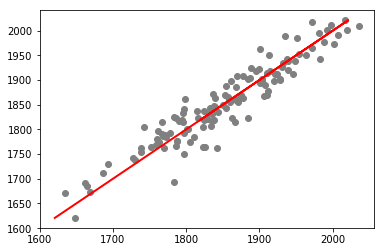

In [29]:
get_plot(y_pred_ridge)

Gradient Boosting Trees

In [0]:
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

y_pred_gb = model_gb.predict(x_test)

In [32]:
get_performance(y_pred_gb)


Mean Absolute Error: 27.1803
Mean Squared Error: 1141.3572
Root Mean Squared Error: 33.784


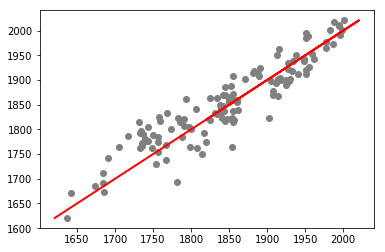

In [33]:
get_plot(y_pred_gb)


In [0]:
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag), 
              "lr":np.absolute(y_test-y_pred_lr), 
              "ridge":np.absolute(y_test-y_pred_ridge),
              "gb":np.absolute(y_test-y_pred_gb)})

(11, 20)

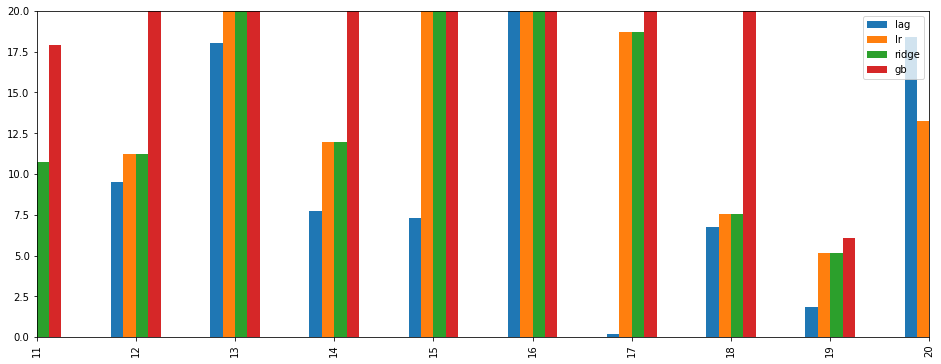

In [37]:
df_comp.plot.bar(figsize=(16, 6))
plt.ylim(0,20)
plt.xlim(11,20)